# 3. Is there a shift in course category over the years?
In this part I would like to make an analysis into the different course categories. I am interested in knowing if there has been a change over time on the preferences of students.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv('Course_info.csv')

In [3]:
df = data[['id', 'published_time', 'title', 'num_subscribers', 'category', 'subcategory', 'topic', 'language']].copy()
df['published_time'] = pd.to_datetime(df['published_time'])
df['year'] = df['published_time'].dt.year

## 3.1 Courses over the years
First it will be interesting to see how the different course categories have evolved over time. For this I get the total number of courses over the entire history of the dataset in order to get the top categories. Then I will plot the evolution of these categories.

In [4]:
df_grouped = df[['id', 'category', 'year']].groupby(by=['category', 'year']).count()

In [5]:
df_grouped.groupby('category').sum().sort_values(by='id', ascending=False)

,id
category,
Development,31643
IT & Software,30479
Teaching & Academics,26293
Business,24670
Personal Development,21239
Design,15256
Health & Fitness,11568
Marketing,11221
Lifestyle,10653


In [6]:
categories = ['Development', 'IT & Software', 'Teaching & Academics', 
              'Business', 'Personal Development', 'Design', 'Health & Fitness']

# All categories
#categories = df_grouped.index.get_level_values(0).unique().values

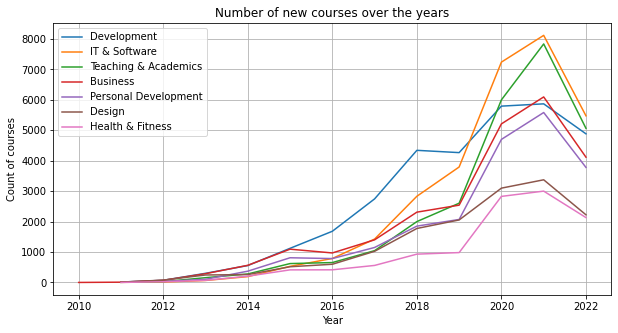

In [7]:
plt.rcParams['figure.figsize']=(10,5)
for cat in categories:
    years = df_grouped.xs(cat).reset_index()['year'].values
    count = df_grouped.xs(cat).reset_index()['id'].values
    plt.plot(years, count, label=cat)

plt.title('Number of new courses over the years')
plt.xlabel('Year')
plt.ylabel('Count of courses')
plt.legend()
plt.grid('on')
plt.show()

Here we can see that the courses which focus on `Development`, `IT & Software`, `Teaching & Academics` and `Business` are the ones who have been growing over time. Interestingly a shift from `Development` courses to `IT & Software` and `Teaching & Academics` occurred from 2019 to 2020.

## 3.2 A finer analysis
I would like to make a finer analysis on the top categories to better understand the trends on each category. Previous results show that `IT & Software` increased in the last years and `Development` courses decreased instead. Let's explore them one by one. 

In [8]:
def finer_analysis(df, key='Development', yearly=True):
    df_finer = df[df['category'] == key].groupby(by=['subcategory','year']).count()[['id']]
    if(yearly):
        return df_finer
    else:
        return df_finer.groupby(by='subcategory').sum()

In [9]:
def get_index(df):
    return df.index.get_level_values(0).unique().values

### 3.2.1 Development subcategory

In [10]:
key = 'Development'
df_sub = finer_analysis(df, key=key, yearly=False)
df_sub_yearly = finer_analysis(df, key=key, yearly=True)
subcategories = get_index(df_sub)
df_sub

,id
subcategory,
Data Science,2836
Database Design & Development,1716
Game Development,2223
Mobile Development,2679
No-Code Development,684
Programming Languages,7027
Software Development Tools,1523
Software Engineering,1523
Software Testing,1039


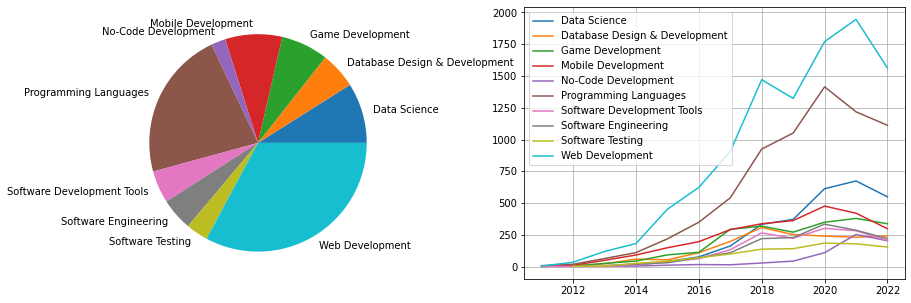

In [11]:
plt.rcParams['figure.figsize']=(15,5)

plt.subplot(1,2,1)
plt.pie(df_sub['id'], labels=subcategories)

plt.subplot(1,2,2)
for cat in subcategories:
    years = df_sub_yearly.xs(cat).reset_index()['year'].values
    count = df_sub_yearly.xs(cat).reset_index()['id'].values
    plt.plot(years, count, label=cat)
plt.legend()
plt.grid('on')
plt.show()

### 3.2.2 IT & Software subcategory

In [12]:
key = 'IT & Software'
df_sub = finer_analysis(df, key=key, yearly=False)
df_sub_yearly = finer_analysis(df, key=key, yearly=True)
subcategories = get_index(df_sub)
df_sub

,id
subcategory,
Hardware,1558
IT Certifications,10337
Network & Security,4833
Operating Systems & Servers,2228
Other IT & Software,11523


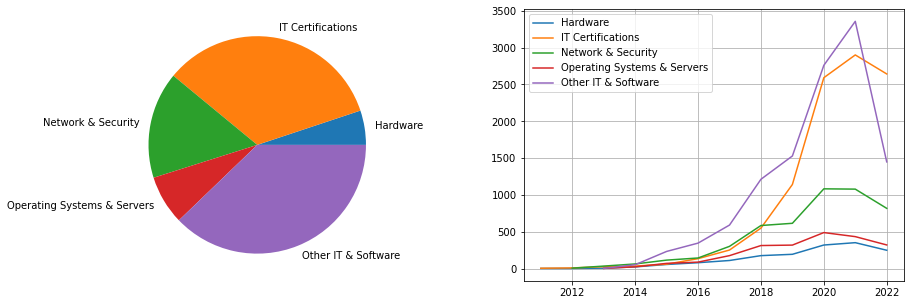

In [13]:
plt.rcParams['figure.figsize']=(15,5)

plt.subplot(1,2,1)
plt.pie(df_sub['id'], labels=subcategories)

plt.subplot(1,2,2)
for cat in subcategories:
    years = df_sub_yearly.xs(cat).reset_index()['year'].values
    count = df_sub_yearly.xs(cat).reset_index()['id'].values
    plt.plot(years, count, label=cat)
plt.legend()
plt.grid('on')
plt.show()

In [14]:
labels = df[df['subcategory']=='Other IT & Software'].groupby(by='topic').count().sort_values(by='id', ascending=False)['id'].index
topics = df[df['subcategory']=='Other IT & Software'].groupby(by='topic').count().sort_values(by='id', ascending=False)['id'].values

In [15]:
text = str(list(labels.values))

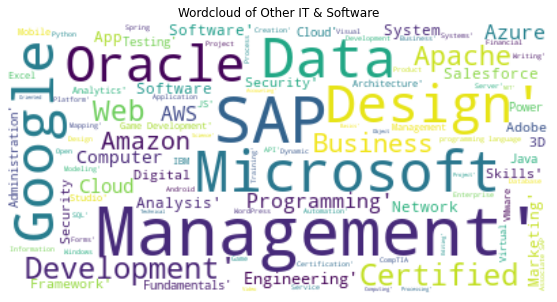

In [16]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Other IT & Software")
plt.show()

### 3.2.3 Teaching & Academics subcategory

In [17]:
key = 'Teaching & Academics'
df_sub = finer_analysis(df, key=key, yearly=False)
df_sub_yearly = finer_analysis(df, key=key, yearly=True)
subcategories = get_index(df_sub)
df_sub

,id
subcategory,
Engineering,4348
Humanities,1170
Language Learning,7551
Math,2384
Online Education,1724
Other Teaching & Academics,2164
Science,2096
Social Science,979
Teacher Training,1532


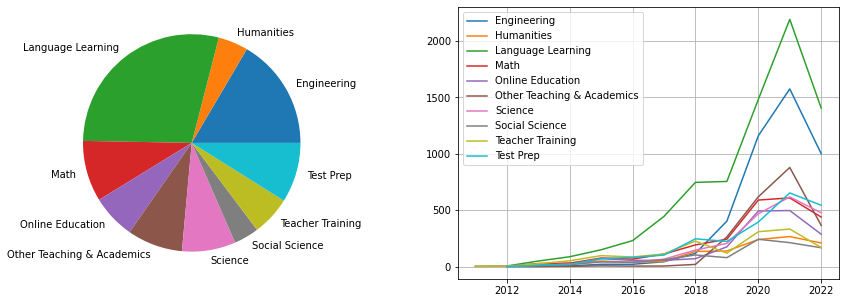

In [18]:
plt.rcParams['figure.figsize']=(15,5)

plt.subplot(1,2,1)
plt.pie(df_sub['id'], labels=subcategories)

plt.subplot(1,2,2)
for cat in subcategories:
    years = df_sub_yearly.xs(cat).reset_index()['year'].values
    count = df_sub_yearly.xs(cat).reset_index()['id'].values
    plt.plot(years, count, label=cat)
plt.legend()
plt.grid('on')
plt.show()

### 3.2.4 Business

In [19]:
key = 'Business'
df_sub = finer_analysis(df, key=key, yearly=False)
df_sub_yearly = finer_analysis(df, key=key, yearly=True)
subcategories = get_index(df_sub)
df_sub

,id
subcategory,
Business Analytics & Intelligence,1760
Business Law,365
Business Strategy,1588
Communication,1970
E-Commerce,2172
Entrepreneurship,4347
Human Resources,1107
Industry,749
Management,3118


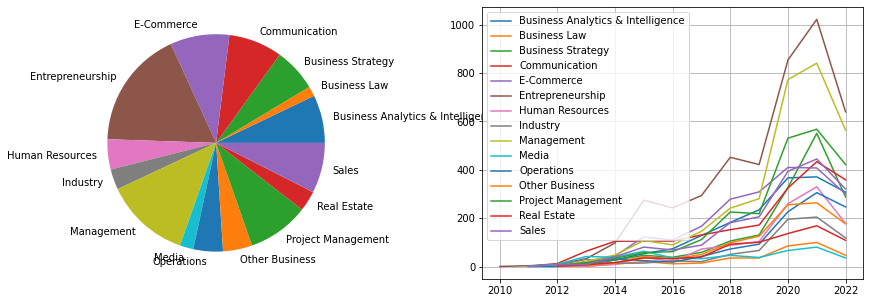

In [20]:
plt.rcParams['figure.figsize']=(15,5)

plt.subplot(1,2,1)
plt.pie(df_sub['id'], labels=subcategories)

plt.subplot(1,2,2)
for cat in subcategories:
    years = df_sub_yearly.xs(cat).reset_index()['year'].values
    count = df_sub_yearly.xs(cat).reset_index()['id'].values
    plt.plot(years, count, label=cat)
plt.legend()
plt.grid('on')
plt.show()

## 3.3 Conclusion
From these results we can see that over the years there has been an increase in online courses, but during the pandemic people started to look for courses that covered IT Certifications or were more academic causing a drop in courses that focused on developing software. Interestingly this might come from the fact that during the pandemic people used their free time to complete a course training for an IT certification or wanted to learn a new language as data shows.